In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/energy-consumption-generation-prices-and-weather/weather_features.csv
/kaggle/input/energy-consumption-generation-prices-and-weather/energy_dataset.csv


In [2]:
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()

In [3]:
weather_main = pd.read_csv("/kaggle/input/energy-consumption-generation-prices-and-weather/weather_features.csv")
energy_main = pd.read_csv("/kaggle/input/energy-consumption-generation-prices-and-weather/energy_dataset.csv")

In [4]:
sample_energy = energy_main.tail(100)
sample_weather = weather_main.tail(100)

#### SAMPLE_ENERGY EXPLORATION

In [5]:
sample_energy

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
34964,2018-12-27 20:00:00+01:00,320.0,721.0,0.0,13280.0,2923.0,308.0,0.0,0.0,0.0,...,307.0,0.0,1198.0,30.0,NaN,1089.0,33468.0,33142.0,70.00,78.99
34965,2018-12-27 21:00:00+01:00,318.0,721.0,0.0,13091.0,2932.0,308.0,0.0,0.0,0.0,...,306.0,0.0,1240.0,29.0,NaN,1157.0,32799.0,32669.0,70.01,77.65
34966,2018-12-27 22:00:00+01:00,317.0,721.0,0.0,11128.0,2941.0,307.0,0.0,0.0,0.0,...,304.0,0.0,1326.0,26.0,NaN,1261.0,30625.0,30753.0,68.71,73.28
34967,2018-12-27 23:00:00+01:00,316.0,705.0,0.0,9240.0,2921.0,306.0,0.0,0.0,0.0,...,308.0,0.0,1398.0,27.0,NaN,1369.0,27729.0,27882.0,68.40,73.48
34968,2018-12-28 00:00:00+01:00,317.0,693.0,0.0,6871.0,2822.0,275.0,0.0,0.0,0.0,...,309.0,0.0,1537.0,11.0,NaN,1356.0,25291.0,25147.0,67.34,70.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2018-12-31 19:00:00+01:00,297.0,0.0,0.0,7634.0,2628.0,178.0,0.0,0.0,0.0,...,277.0,0.0,3113.0,96.0,NaN,3253.0,30619.0,30653.0,68.85,77.02
35060,2018-12-31 20:00:00+01:00,296.0,0.0,0.0,7241.0,2566.0,174.0,0.0,0.0,0.0,...,280.0,0.0,3288.0,51.0,NaN,3353.0,29932.0,29735.0,68.40,76.16
35061,2018-12-31 21:00:00+01:00,292.0,0.0,0.0,7025.0,2422.0,168.0,0.0,0.0,0.0,...,286.0,0.0,3503.0,36.0,NaN,3404.0,27903.0,28071.0,66.88,74.30
35062,2018-12-31 22:00:00+01:00,293.0,0.0,0.0,6562.0,2293.0,163.0,0.0,0.0,0.0,...,287.0,0.0,3586.0,29.0,NaN,3273.0,25450.0,25801.0,63.93,69.89


In [6]:
sample_energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 34964 to 35063
Data columns (total 29 columns):
time                                           100 non-null object
generation biomass                             100 non-null float64
generation fossil brown coal/lignite           100 non-null float64
generation fossil coal-derived gas             100 non-null float64
generation fossil gas                          100 non-null float64
generation fossil hard coal                    100 non-null float64
generation fossil oil                          100 non-null float64
generation fossil oil shale                    100 non-null float64
generation fossil peat                         100 non-null float64
generation geothermal                          100 non-null float64
generation hydro pumped storage aggregated     0 non-null float64
generation hydro pumped storage consumption    100 non-null float64
generation hydro run-of-river and poundage     100 non-null float64
generati

In [7]:
def unique_values(df): 
    for col in df :
        if df[col].dtypes == "object":
            print (df[col].unique())

unique_values(sample_energy)

['2018-12-27 20:00:00+01:00' '2018-12-27 21:00:00+01:00'
 '2018-12-27 22:00:00+01:00' '2018-12-27 23:00:00+01:00'
 '2018-12-28 00:00:00+01:00' '2018-12-28 01:00:00+01:00'
 '2018-12-28 02:00:00+01:00' '2018-12-28 03:00:00+01:00'
 '2018-12-28 04:00:00+01:00' '2018-12-28 05:00:00+01:00'
 '2018-12-28 06:00:00+01:00' '2018-12-28 07:00:00+01:00'
 '2018-12-28 08:00:00+01:00' '2018-12-28 09:00:00+01:00'
 '2018-12-28 10:00:00+01:00' '2018-12-28 11:00:00+01:00'
 '2018-12-28 12:00:00+01:00' '2018-12-28 13:00:00+01:00'
 '2018-12-28 14:00:00+01:00' '2018-12-28 15:00:00+01:00'
 '2018-12-28 16:00:00+01:00' '2018-12-28 17:00:00+01:00'
 '2018-12-28 18:00:00+01:00' '2018-12-28 19:00:00+01:00'
 '2018-12-28 20:00:00+01:00' '2018-12-28 21:00:00+01:00'
 '2018-12-28 22:00:00+01:00' '2018-12-28 23:00:00+01:00'
 '2018-12-29 00:00:00+01:00' '2018-12-29 01:00:00+01:00'
 '2018-12-29 02:00:00+01:00' '2018-12-29 03:00:00+01:00'
 '2018-12-29 04:00:00+01:00' '2018-12-29 05:00:00+01:00'
 '2018-12-29 06:00:00+01:00' '2

In [8]:
sample_energy.astype(bool).sum()

time                                           100
generation biomass                             100
generation fossil brown coal/lignite            29
generation fossil coal-derived gas               0
generation fossil gas                          100
generation fossil hard coal                    100
generation fossil oil                          100
generation fossil oil shale                      0
generation fossil peat                           0
generation geothermal                            0
generation hydro pumped storage aggregated     100
generation hydro pumped storage consumption    100
generation hydro run-of-river and poundage     100
generation hydro water reservoir               100
generation marine                                0
generation nuclear                             100
generation other                               100
generation other renewable                     100
generation solar                               100
generation waste               

In [9]:
sample_energy = sample_energy.drop(["generation fossil coal-derived gas","generation fossil oil shale","generation fossil peat","generation geothermal","generation marine","generation wind offshore"], axis =1)

#### SAMPLE_WEATHER EXPLORATION

In [10]:
sample_weather

,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
178296,2018-12-27 20:00:00+01:00,Seville,284.54,284.15,285.15,1027,76,1,35,0.0,0.0,0.0,0,800,clear,sky is clear,01n
178297,2018-12-27 21:00:00+01:00,Seville,282.15,282.15,282.15,1027,87,2,120,0.0,0.0,0.0,0,800,clear,sky is clear,01n
178298,2018-12-27 22:00:00+01:00,Seville,280.93,280.15,282.15,1027,93,0,0,0.0,0.0,0.0,0,800,clear,sky is clear,01n
178299,2018-12-27 23:00:00+01:00,Seville,279.54,279.15,280.15,1027,93,1,140,0.0,0.0,0.0,0,701,mist,mist,50n
178300,2018-12-28 00:00:00+01:00,Seville,279.94,279.15,281.15,1027,93,1,40,0.0,0.0,0.0,0,701,mist,mist,50n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178391,2018-12-31 19:00:00+01:00,Seville,287.76,287.15,288.15,1028,54,3,30,0.0,0.0,0.0,0,800,clear,sky is clear,01n
178392,2018-12-31 20:00:00+01:00,Seville,285.76,285.15,286.15,1029,62,3,30,0.0,0.0,0.0,0,800,clear,sky is clear,01n
178393,2018-12-31 21:00:00+01:00,Seville,285.15,285.15,285.15,1028,58,4,50,0.0,0.0,0.0,0,800,clear,sky is clear,01n
178394,2018-12-31 22:00:00+01:00,Seville,284.15,284.15,284.15,1029,57,4,60,0.0,0.0,0.0,0,800,clear,sky is clear,01n


In [11]:
sample_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 178296 to 178395
Data columns (total 17 columns):
dt_iso                 100 non-null object
city_name              100 non-null object
temp                   100 non-null float64
temp_min               100 non-null float64
temp_max               100 non-null float64
pressure               100 non-null int64
humidity               100 non-null int64
wind_speed             100 non-null int64
wind_deg               100 non-null int64
rain_1h                100 non-null float64
rain_3h                100 non-null float64
snow_3h                100 non-null float64
clouds_all             100 non-null int64
weather_id             100 non-null int64
weather_main           100 non-null object
weather_description    100 non-null object
weather_icon           100 non-null object
dtypes: float64(6), int64(6), object(5)
memory usage: 13.4+ KB


In [12]:
unique_values(sample_weather)

['2018-12-27 20:00:00+01:00' '2018-12-27 21:00:00+01:00'
 '2018-12-27 22:00:00+01:00' '2018-12-27 23:00:00+01:00'
 '2018-12-28 00:00:00+01:00' '2018-12-28 01:00:00+01:00'
 '2018-12-28 02:00:00+01:00' '2018-12-28 03:00:00+01:00'
 '2018-12-28 04:00:00+01:00' '2018-12-28 05:00:00+01:00'
 '2018-12-28 06:00:00+01:00' '2018-12-28 07:00:00+01:00'
 '2018-12-28 08:00:00+01:00' '2018-12-28 09:00:00+01:00'
 '2018-12-28 10:00:00+01:00' '2018-12-28 11:00:00+01:00'
 '2018-12-28 12:00:00+01:00' '2018-12-28 13:00:00+01:00'
 '2018-12-28 14:00:00+01:00' '2018-12-28 15:00:00+01:00'
 '2018-12-28 16:00:00+01:00' '2018-12-28 17:00:00+01:00'
 '2018-12-28 18:00:00+01:00' '2018-12-28 19:00:00+01:00'
 '2018-12-28 20:00:00+01:00' '2018-12-28 21:00:00+01:00'
 '2018-12-28 22:00:00+01:00' '2018-12-28 23:00:00+01:00'
 '2018-12-29 00:00:00+01:00' '2018-12-29 01:00:00+01:00'
 '2018-12-29 02:00:00+01:00' '2018-12-29 03:00:00+01:00'
 '2018-12-29 04:00:00+01:00' '2018-12-29 05:00:00+01:00'
 '2018-12-29 06:00:00+01:00' '2

In [13]:
sample_weather.astype(bool).sum()

dt_iso                 100
city_name              100
temp                   100
temp_min               100
temp_max               100
pressure               100
humidity               100
wind_speed              95
wind_deg                93
rain_1h                  0
rain_3h                  0
snow_3h                  0
clouds_all               5
weather_id             100
weather_main           100
weather_description    100
weather_icon           100
dtype: int64

In [14]:
sample_weather = sample_weather.drop(["rain_1h","rain_3h","snow_3h","weather_icon","weather_description","temp_min","temp_max","clouds_all"], axis =1)

In [15]:
sample = sample_energy.merge(sample_weather, left_on="time", right_on="dt_iso")

In [16]:
sample = sample.drop(["dt_iso","city_name"], axis =1)

In [17]:
sample.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage aggregated,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,...,total load actual,price day ahead,price actual,temp,pressure,humidity,wind_speed,wind_deg,weather_id,weather_main
0,2018-12-27 20:00:00+01:00,320.0,721.0,13280.0,2923.0,308.0,NaN,1.0,1305.0,4822.0,...,33142.0,70.00,78.99,284.54,1027,76,1,35,800,clear
1,2018-12-27 21:00:00+01:00,318.0,721.0,13091.0,2932.0,308.0,NaN,1.0,1252.0,4186.0,...,32669.0,70.01,77.65,282.15,1027,87,2,120,800,clear
2,2018-12-27 22:00:00+01:00,317.0,721.0,11128.0,2941.0,307.0,NaN,1.0,1225.0,4032.0,...,30753.0,68.71,73.28,280.93,1027,93,0,0,800,clear
3,2018-12-27 23:00:00+01:00,316.0,705.0,9240.0,2921.0,306.0,NaN,1.0,1185.0,4067.0,...,27882.0,68.40,73.48,279.54,1027,93,1,140,701,mist
4,2018-12-28 00:00:00+01:00,317.0,693.0,6871.0,2822.0,275.0,NaN,1.0,1128.0,2470.0,...,25147.0,67.34,70.93,279.94,1027,93,1,40,701,mist


## DATA VISUALIZATION
### Data Distrbution

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f756fb10588>,
      dtype=object)

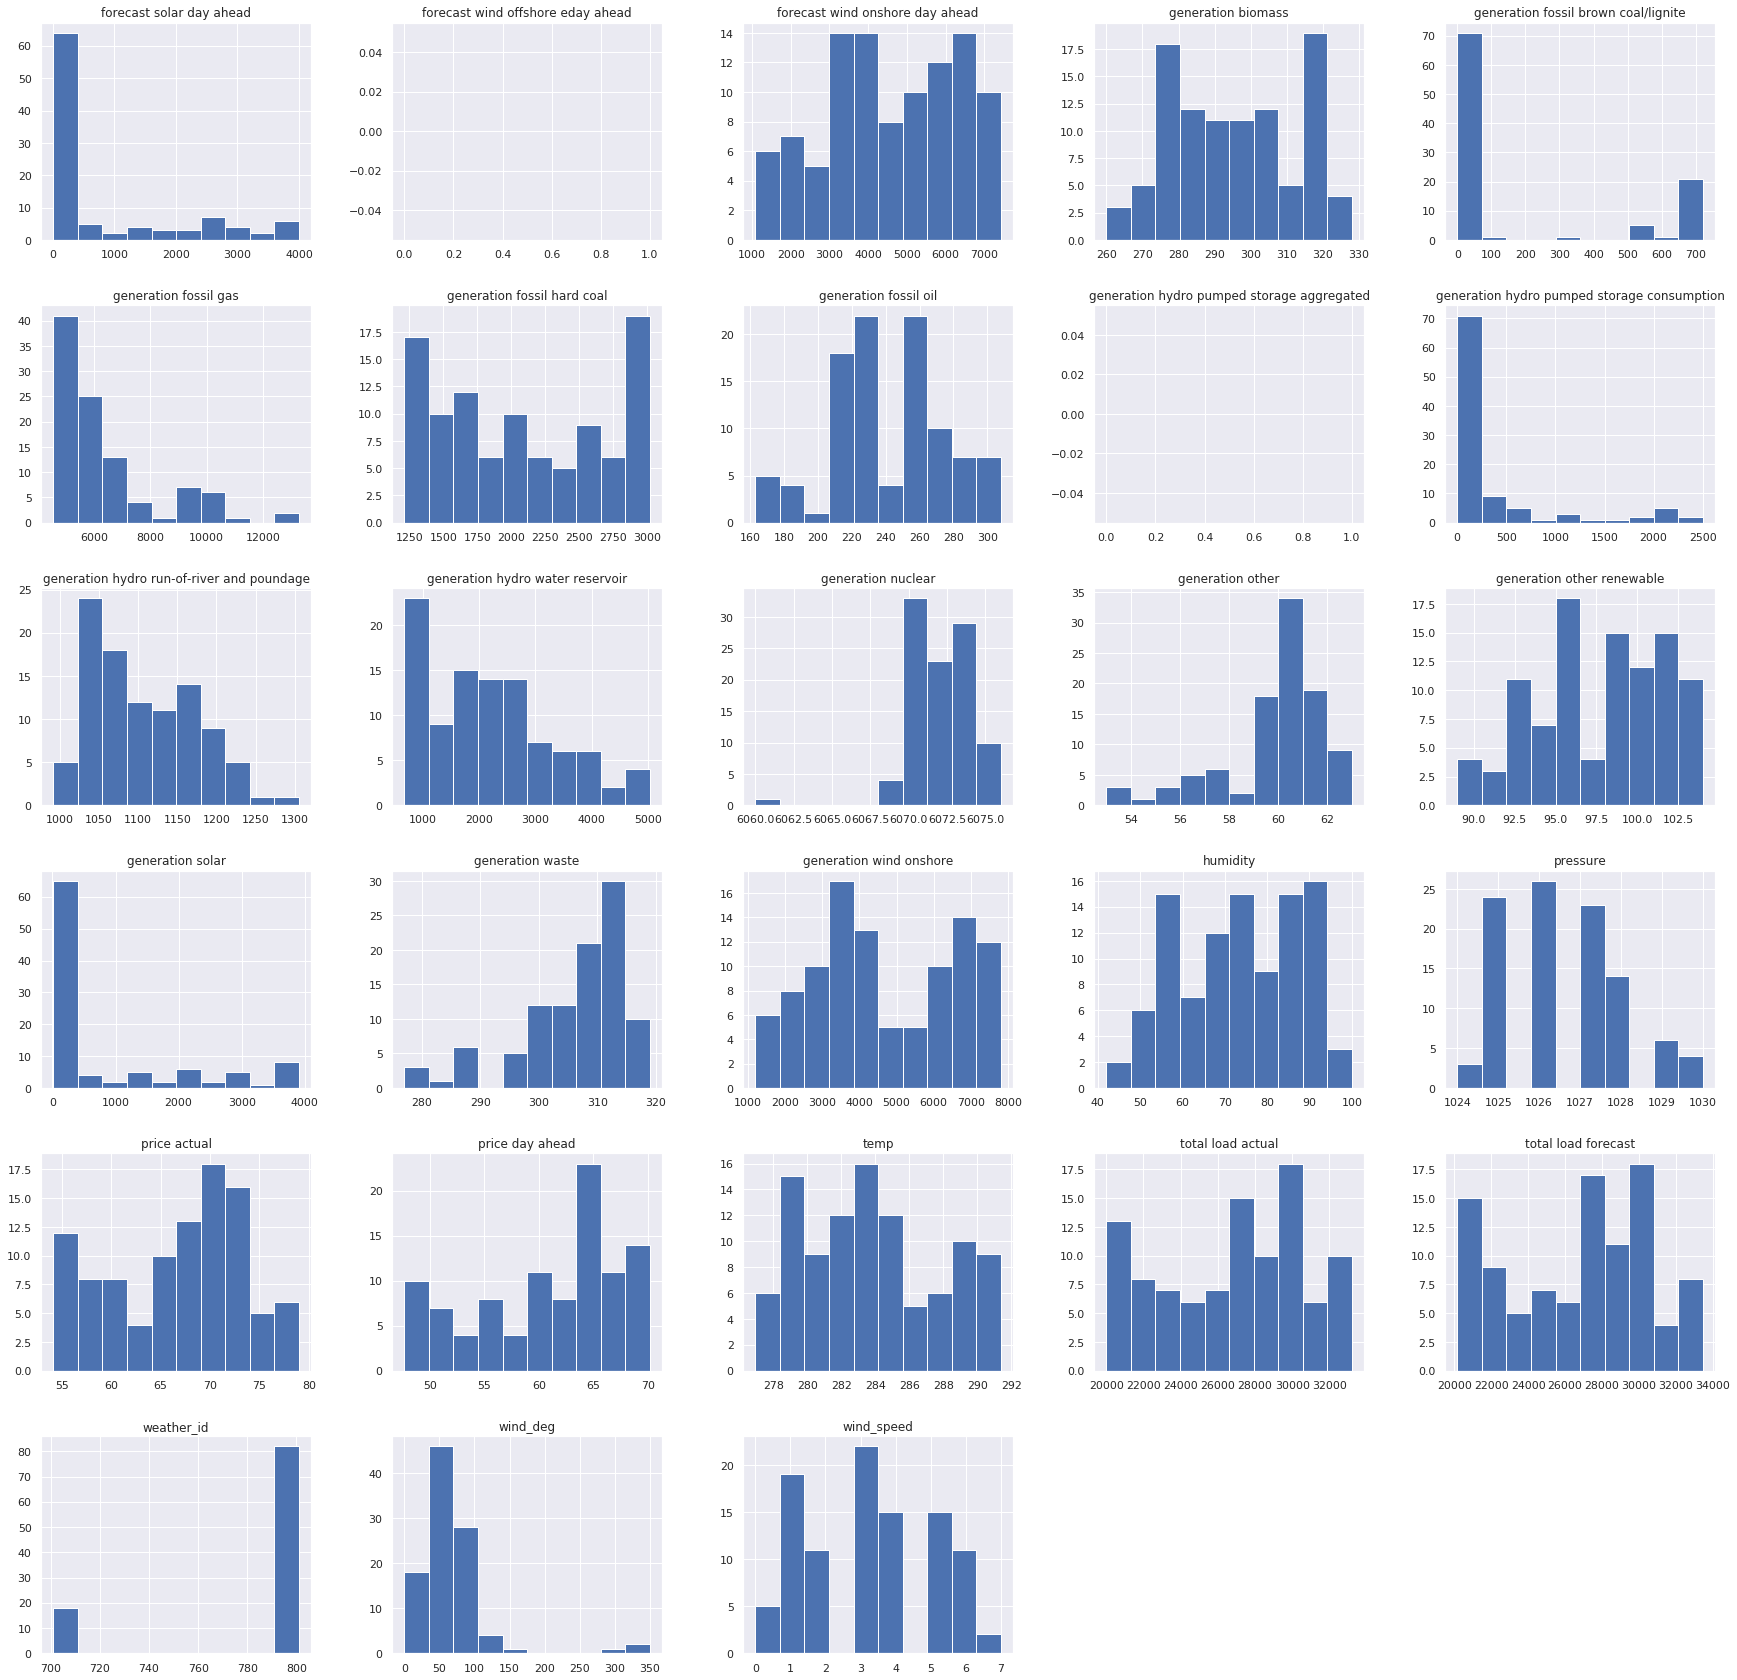

In [18]:
sample.hist(figsize =(30,30))

In [19]:
sample = sample.drop(["forecast wind offshore eday ahead","generation hydro pumped storage aggregated"], axis = 1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f756db15940>,
      dtype=object)

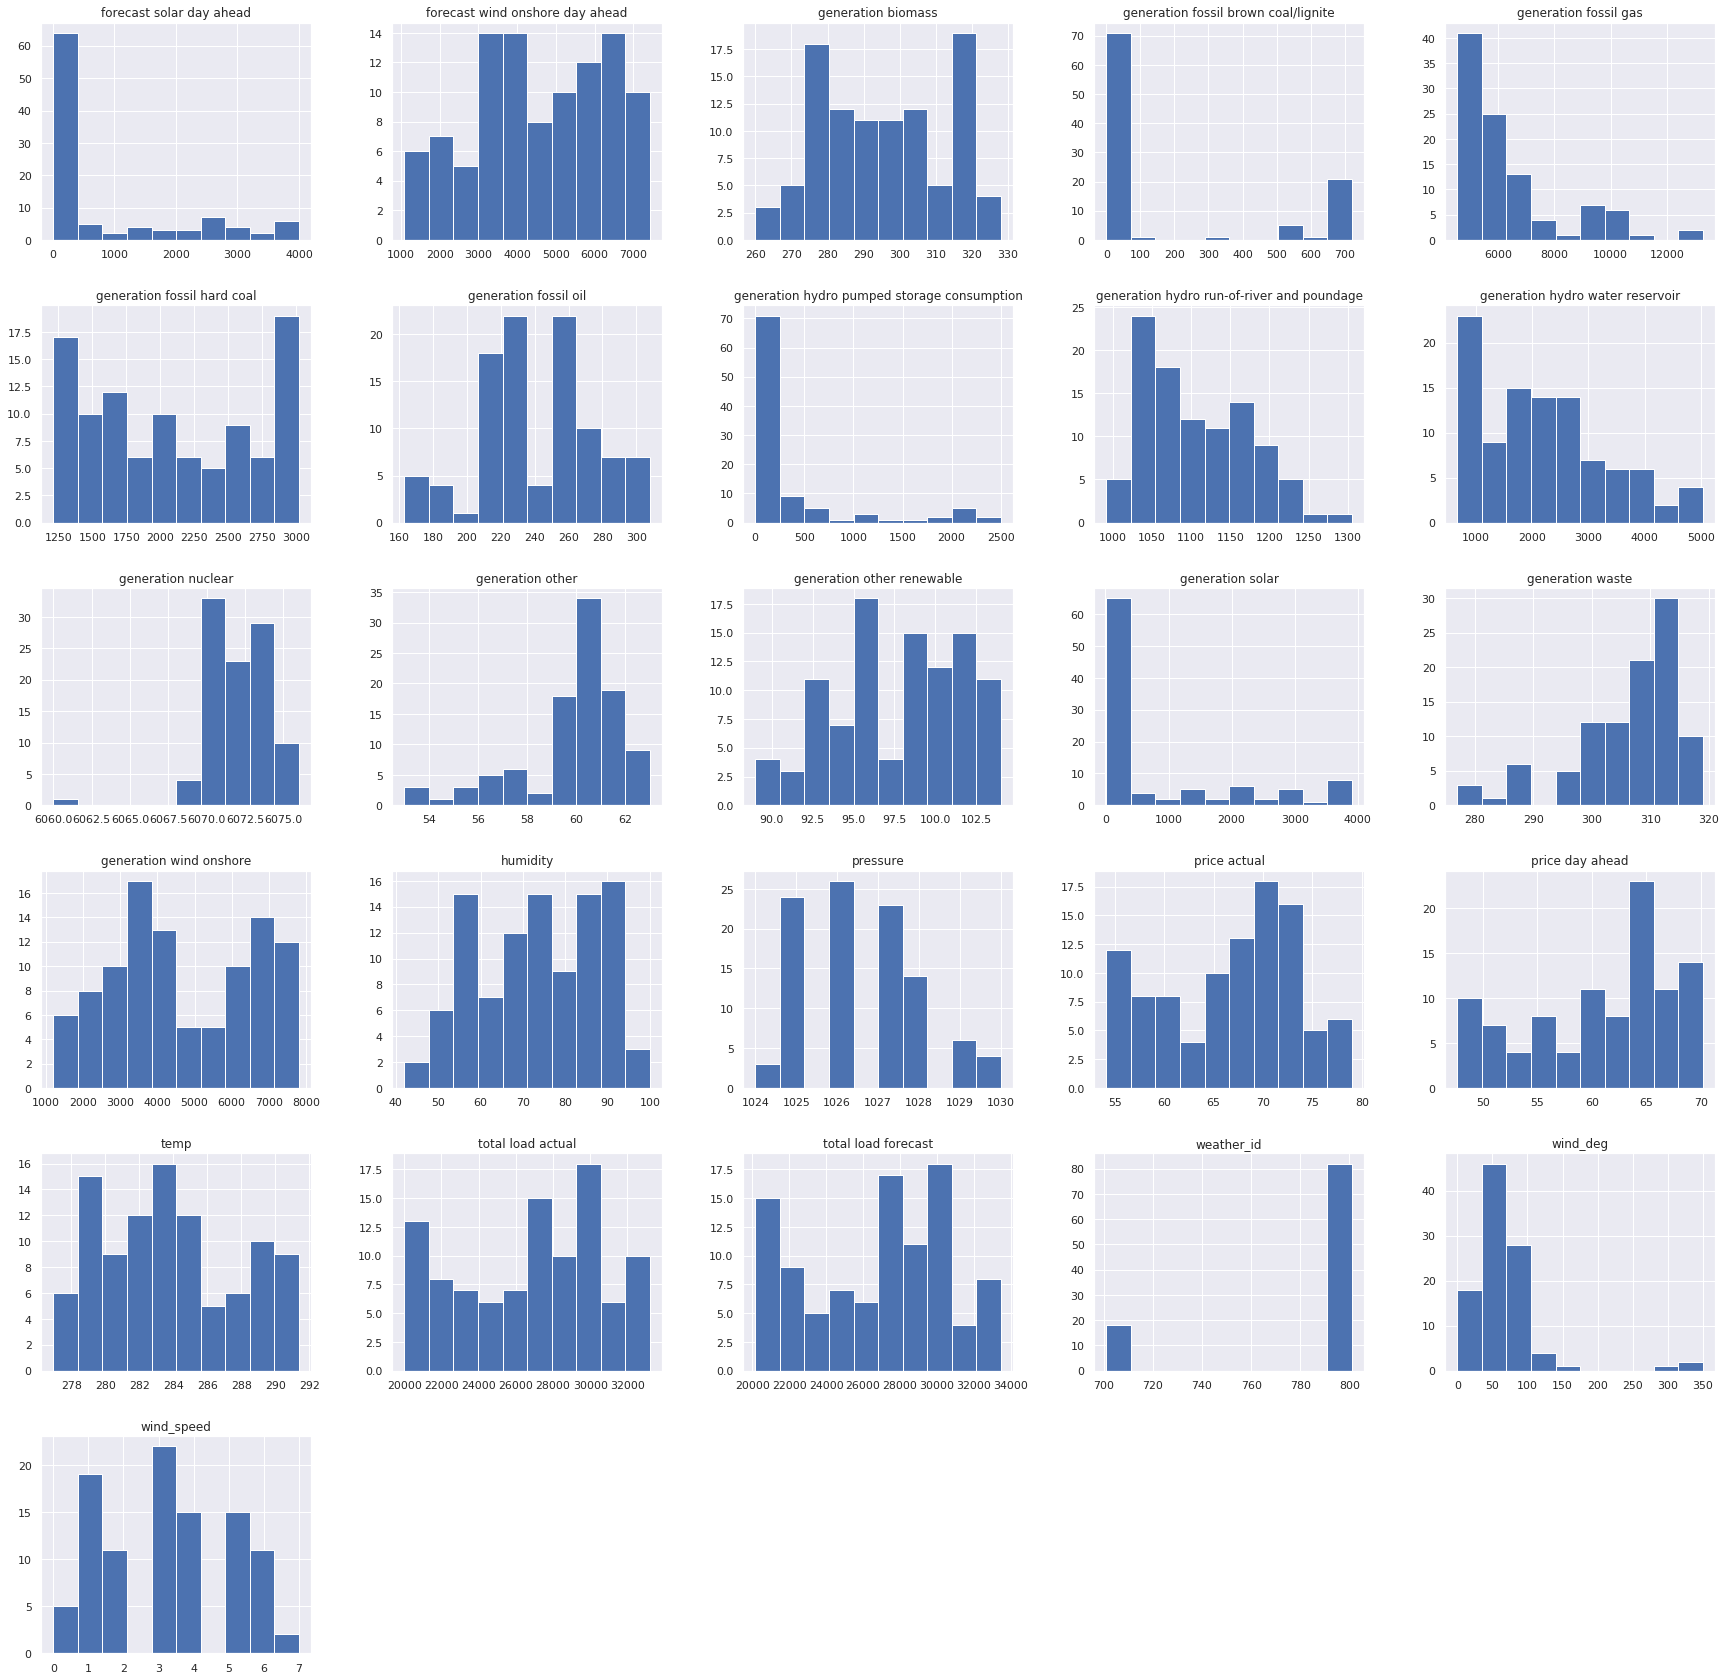

In [20]:
sample.hist(figsize = (30,30))